In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [28]:
df = pd.read_excel('lines.xlsx')
df

,year,name,metre,line
0,1912,УТРО,я4м,Угрю<мый| до<ждь| скоси<л| глаза<.|
1,1912,УТРО,я3ж,А за<| реше<ткой| че<ткой|
2,1912,УТРО,я4м,желе<зной| мы<сли| проводо<в| ―
3,1912,УТРО,я1ж,пери<на.|
4,1912,УТРО,я4м,И на<| нее<| встаю<щих| зве<зд|
...,...,...,...,...
3349,1930,БЕЗЫМЕНСКОМУ,я4ж,коне<ц| несча<стного| убы<стрил.|
3350,1930,АДУЕВУ,я4м,Я скандали<ст!| Я не мона<х.|
3351,1930,АДУЕВУ,я4д,Но ка<к| под но<готь| взя<ть| Аду<ева?|
3352,1930,АДУЕВУ,я4м,"Ищу<| у о<блака| в штана<х,|"


In [29]:
for i in range(0, len(df)):
  if len(df['metre'][i]) == 3:
    df.loc[i, 'metre'] = df['metre'][i][0] + df['metre'][i][1]
  else:
    df.loc[i, 'metre'] = df['metre'][i][0] + df['metre'][i][1] + df['metre'][i][2]
df

,year,name,metre,line
0,1912,УТРО,я4,Угрю<мый| до<ждь| скоси<л| глаза<.|
1,1912,УТРО,я3,А за<| реше<ткой| че<ткой|
2,1912,УТРО,я4,желе<зной| мы<сли| проводо<в| ―
3,1912,УТРО,я1,пери<на.|
4,1912,УТРО,я4,И на<| нее<| встаю<щих| зве<зд|
...,...,...,...,...
3349,1930,БЕЗЫМЕНСКОМУ,я4,коне<ц| несча<стного| убы<стрил.|
3350,1930,АДУЕВУ,я4,Я скандали<ст!| Я не мона<х.|
3351,1930,АДУЕВУ,я4,Но ка<к| под но<готь| взя<ть| Аду<ева?|
3352,1930,АДУЕВУ,я4,"Ищу<| у о<блака| в штана<х,|"


In [30]:
average_length = []
for i in range(0, len(df['line'])):
  line_to_analyze = df['line'][i]
  words_in_line = re.split(r'\s*\|\s*', line_to_analyze)
  final_words = []
  for n in words_in_line:
    stripped_word = n.strip()
    if stripped_word:
      final_words.append(stripped_word)
  syllable_counts = []
  for n in final_words:
    vowels = re.findall(r'[аеёиоуыэюяАЕЁИОУЫЭЮЯ]', n)
    syllable_counts.append(len(vowels))
  average_length.append(sum(syllable_counts) / len(syllable_counts))
df['average_length'] = average_length
df

,year,name,metre,line,average_length
0,1912,УТРО,я4,Угрю<мый| до<ждь| скоси<л| глаза<.|,2.000000
1,1912,УТРО,я3,А за<| реше<ткой| че<ткой|,2.333333
2,1912,УТРО,я4,желе<зной| мы<сли| проводо<в| ―,2.000000
3,1912,УТРО,я1,пери<на.|,3.000000
4,1912,УТРО,я4,И на<| нее<| встаю<щих| зве<зд|,2.000000
...,...,...,...,...,...
3349,1930,БЕЗЫМЕНСКОМУ,я4,коне<ц| несча<стного| убы<стрил.|,3.000000
3350,1930,АДУЕВУ,я4,Я скандали<ст!| Я не мона<х.|,4.000000
3351,1930,АДУЕВУ,я4,Но ка<к| под но<готь| взя<ть| Аду<ева?|,2.500000
3352,1930,АДУЕВУ,я4,"Ищу<| у о<блака| в штана<х,|",2.666667


<ipython-input-31-b6c703d2d9cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


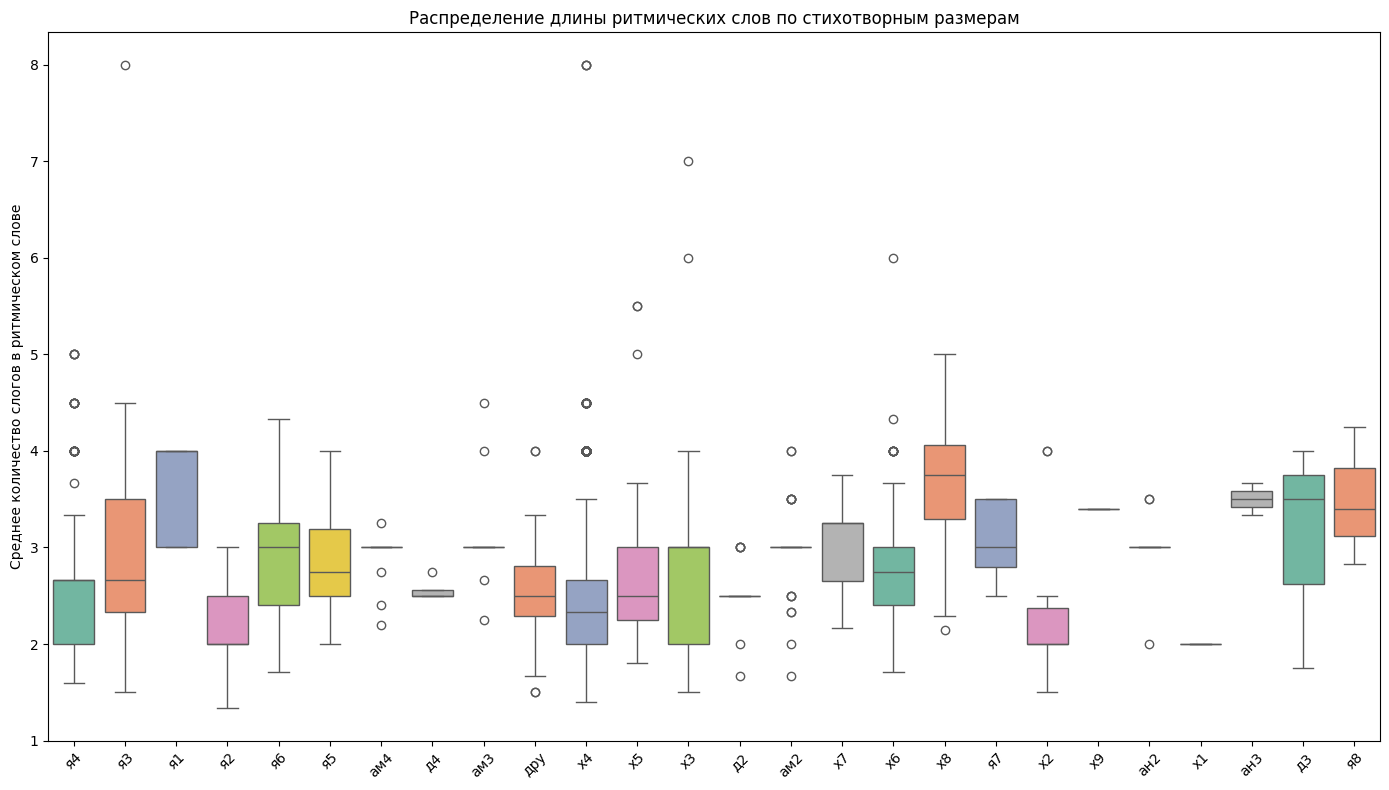

In [31]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    x = df['metre'],
    y = df['average_length'],
    data=df[['metre', 'average_length']],
    palette='Set2'
)
plt.title('Распределение длины ритмических слов по стихотворным размерам')
plt.xlabel('')
plt.ylabel('Среднее количество слогов в ритмическом слове')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()